In [ ]:
!pip install transformers

In [ ]:
!pip install tape_proteins

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.3 MB/s eta 0:00:00


In [ ]:
!pip install numpy

In [ ]:
!pip install tensorflow
!pip install pytorch_lightning
!pip install SentencePiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.2 MB/s eta 0:00:00


In [ ]:
import torch
import pandas as pd
import numpy as np
from tape import ProteinBertModel, TAPETokenizer
from sklearn.model_selection import train_test_split

# Load your CSV file
file_path = 'data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Assuming 'Sequence' is the column containing protein sequences, and 'Label' is the target column
X = df['Sequence']
y = df['Label']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the model and tokenizer
model = ProteinBertModel.from_pretrained('bert-base')
tokenizer = TAPETokenizer(vocab='iupac')
w = 32  # Adjust the window size as needed

# Function to calculate embeddings
def calculate_embeddings(data):
    embeddings = []
    for i in range(data.shape[0]):
        # Tokenize the protein sequence
        token_id = torch.tensor([tokenizer.encode(data.iloc[i])])

        # Get word embeddings from the model
        output = model(token_id)[0]
        word_embeddings = output[0][1:2 * w + 2].detach().numpy()

        # Append the word embeddings to the list
        embeddings.append(word_embeddings)

    # Stack and reorganize the data
    embeddings = np.dstack(embeddings)
    embeddings = np.rollaxis(embeddings, -1)

    return embeddings

# Calculate word embeddings for training, validation, and testing sets
X_train_ds = calculate_embeddings(X_train)
X_valid_ds = calculate_embeddings(X_valid)
X_test_ds = calculate_embeddings(X_test)

# Display the resulting word embeddings for training data
print("Training Set Word Embeddings:")
print(X_train_ds)

# Display the resulting word embeddings for validation data
print("\nValidation Set Word Embeddings:")
print(X_valid_ds)

# Display the resulting word embeddings for testing data
print("\nTesting Set Word Embeddings:")
print(X_test_ds)


100%|██████████| 370264230/370264230 [00:17<00:00, 21695842.06B/s]
<ipython-input-6-3aad38d247a8>:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  token_id = torch.tensor([tokenizer.encode(data.iloc[i])])


Training Set Word Embeddings:
[[[ 1.73377730e-02 -3.83696109e-01  2.98043489e-01 ... -1.32967460e+00
   -4.64029253e-01  7.29429841e-01]
  [-9.61359590e-03 -3.21595192e-01  2.59448498e-01 ... -1.29598463e+00
   -4.91489530e-01  6.87206984e-01]
  [-2.18315423e-02 -3.16617608e-01  2.82717973e-01 ... -1.30541217e+00
   -4.88838375e-01  7.31680870e-01]
  ...
  [-1.41119957e+00 -9.18578327e-01  2.47332215e-01 ... -1.94758326e-01
    6.43528640e-01  2.21303478e-01]
  [-4.40890759e-01 -9.56120312e-01 -5.78491166e-02 ... -2.11862892e-01
    2.35346317e-01  3.69002998e-01]
  [-2.55006582e-01 -6.74155578e-02 -1.22338021e+00 ... -1.41332000e-01
   -1.06859112e+00 -2.44828433e-01]]

 [[-5.73265910e-01 -2.18547463e+00 -1.84701011e-02 ...  5.05213261e-01
    6.17951334e-01  3.45080048e-02]
  [-5.26258647e-01 -1.36354101e+00  2.97721088e-01 ... -3.61079603e-01
    1.82904795e-01 -6.69434607e-01]
  [-6.23336062e-02 -1.55026138e+00 -4.06529278e-01 ...  6.82667494e-01
    1.43972325e+00  1.24407664e-01]

In [ ]:
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
import os
import logging
from configparser import ConfigParser

logger = logging.getLogger(__name__)

def CNNModel(X_train, Y_train, X_valid, Y_valid, embedding_input_shape, config_file='CNN_config.ini'):
    # Load configuration from the specified INI file
    parser = ConfigParser(os.environ)
    if not os.path.exists(config_file):
        raise IOError("Configuration file '%s' does not exist" % config_file)
    logging.info('Loading config from %s', config_file)
    parser.read(config_file)
    config_header = 'CNN'

    logger.info('config header: %s', config_header)

    # Retrieve hyperparameters from the configuration file
    filters = parser.getint(config_header, 'filters')
    kernels = parser.getint(config_header, 'kernels')
    dense_layers1 = parser.getint(config_header, 'dense_layers1')
    dense_layers2 = parser.getint(config_header, 'dense_layers2')
    Learning_Rate = parser.getfloat(config_header, 'Learning_Rate')
    dropout = parser.getfloat(config_header, 'dropout')
    Batch_size = parser.getint(config_header, 'Batch_size')
    Epochs = parser.getint(config_header, 'Epochs')
    earlystop = parser.getboolean(config_header, 'earlystop')

    # Define the model input shape based on the protein embeddings
    inputs = keras.Input(shape=embedding_input_shape, dtype="float32")

    kmodel = keras.models.Sequential()
    kmodel.add(layers.Reshape(input_shape=embedding_input_shape, target_shape=embedding_input_shape))
    kmodel.add(layers.Conv1D(filters, kernel_size=kernels, padding='same', batch_input_shape=(None, *embedding_input_shape)))
    kmodel.add(layers.BatchNormalization(name="conv_1_bn"))
    kmodel.add(layers.ReLU(name="conv_1_relu"))

    kmodel.add(layers.Flatten())
    kmodel.add(layers.Dense(dense_layers1, activation='relu'))
    kmodel.add(layers.Dense(dense_layers2, kernel_regularizer=keras.regularizers.l2(0.001),
                            activity_regularizer=keras.regularizers.l1(0.001)))
    kmodel.add(layers.Activation('relu'))
    kmodel.add(layers.Dropout(dropout))
    kmodel.add(layers.Dense(1, activation='sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=Learning_Rate)
    kmodel.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=opt)
    callback1 = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=8, restore_best_weights=True)
    if earlystop:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid),
                   callbacks=[callback1])
    else:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid))

    return kmodel



# Modify the input shape based on the dimensions of your protein embeddings
model_input_shape = X_train_ds.shape[1:]

# Call your CNNModel function
model = CNNModel(X_train_ds, y_train, X_train_ds, y_train, embedding_input_shape=model_input_shape)
model.save('BertCNN.h5')


Epoch 1/100
82/82 [==============================] - 5s 42ms/step - loss: 0.7482 - accuracy: 0.5702 - val_loss: 0.6548 - val_accuracy: 0.6777
Epoch 2/100
82/82 [==============================] - 1s 18ms/step - loss: 0.6390 - accuracy: 0.6804 - val_loss: 0.5566 - val_accuracy: 0.7517
Epoch 3/100
82/82 [==============================] - 1s 18ms/step - loss: 0.5676 - accuracy: 0.7321 - val_loss: 0.4408 - val_accuracy: 0.8210
Epoch 4/100
82/82 [==============================] - 1s 17ms/step - loss: 0.4628 - accuracy: 0.7950 - val_loss: 0.3100 - val_accuracy: 0.8860
Epoch 5/100
82/82 [==============================] - 2s 22ms/step - loss: 0.3693 - accuracy: 0.8498 - val_loss: 0.2537 - val_accuracy: 0.9088
Epoch 6/100
82/82 [==============================] - 2s 20ms/step - loss: 0.2577 - accuracy: 0.9096 - val_loss: 0.1787 - val_accuracy: 0.9471
Epoch 7/100
82/82 [==============================] - 1s 17ms/step - loss: 0.1921 - accuracy: 0.9389 - val_loss: 0.1079 - val_accuracy: 0.9743
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
from keras.models import load_model
model = load_model('BertCNN.h5')
# Predict on the test data
y_pred = model.predict(X_test_ds)

# Convert the probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_binary)

# Print the results
print(f'AUC: {auc}')
print(f'Accuracy: {acc}')

35/35 [==============================] - 0s 5ms/step
AUC: 0.6864104481905529
Accuracy: 0.6380697050938338


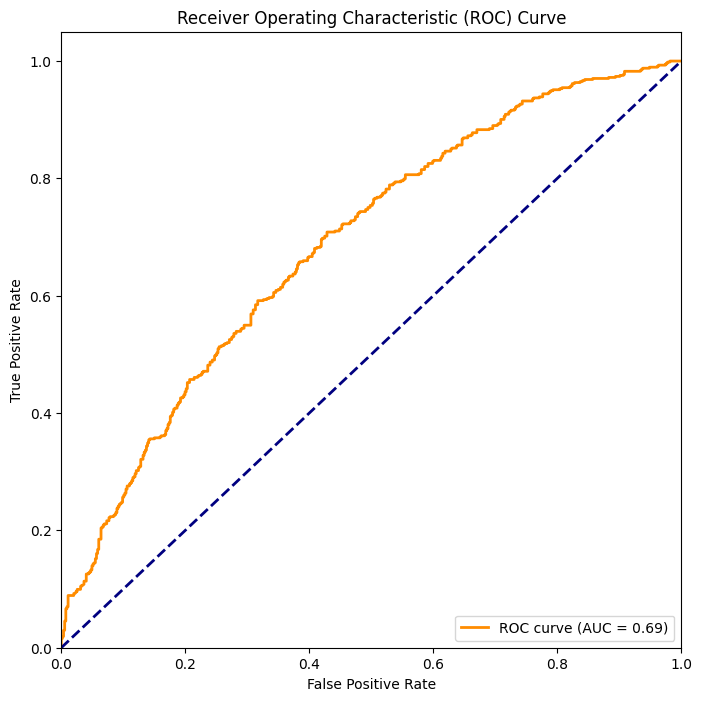

AUC: 0.6864104481905529
Accuracy: 0.6380697050938338


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you already have the true labels 'y_test' and predicted probabilities 'y_pred'
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC and accuracy values
print(f'AUC: {roc_auc}')
print(f'Accuracy: {acc}')


In [ ]:
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
import os
import logging
from configparser import ConfigParser

logger = logging.getLogger(__name__)

def CNNWithBiLSTMModel(X_train, Y_train, X_valid, Y_valid, embedding_input_shape, config_file='CNN_config.ini'):
    # Load configuration from the specified INI file
    parser = ConfigParser(os.environ)
    if not os.path.exists(config_file):
        raise IOError("Configuration file '%s' does not exist" % config_file)
    logging.info('Loading config from %s', config_file)
    parser.read(config_file)
    config_header = 'CNN'

    logger.info('config header: %s', config_header)

    # Retrieve hyperparameters from the configuration file
    filters = parser.getint(config_header, 'filters')
    kernels = parser.getint(config_header, 'kernels')
    dense_layers1 = parser.getint(config_header, 'dense_layers1')
    dense_layers2 = parser.getint(config_header, 'dense_layers2')
    Learning_Rate = parser.getfloat(config_header, 'Learning_Rate')
    dropout = parser.getfloat(config_header, 'dropout')
    Batch_size = parser.getint(config_header, 'Batch_size')
    Epochs = parser.getint(config_header, 'Epochs')
    earlystop = parser.getboolean(config_header, 'earlystop')

    # Define the model input shape based on the protein embeddings
    inputs = keras.Input(shape=embedding_input_shape, dtype="float32")

    # Add Bidirectional LSTM layer
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)

    # Add CNN layers
    x = layers.Conv1D(filters, kernel_size=kernels, padding='same')(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)
    x = layers.Flatten()(x)

    # Add Dense layers
    x = layers.Dense(dense_layers1, activation='relu')(x)
    x = layers.Dense(dense_layers2, kernel_regularizer=keras.regularizers.l2(0.001),
                     activity_regularizer=keras.regularizers.l1(0.001))(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout)(x)

    # Output layer
    outputs = layers.Dense(1, activation='sigmoid')(x)

    # Create and compile the model
    kmodel = keras.Model(inputs, outputs)
    opt = keras.optimizers.Adam(learning_rate=Learning_Rate)
    kmodel.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=opt)

    # Define early stopping callback
    callback1 = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=8, restore_best_weights=True)

    # Train the model
    if earlystop:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid),
                   callbacks=[callback1])
    else:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid))

    return kmodel

# Modify the input shape based on the dimensions of your protein embeddings
model_input_shape = X_train_ds.shape[1:]

# Call your CNNWithBiLSTMModel function
model = CNNWithBiLSTMModel(X_train_ds, y_train, X_train_ds, y_train, embedding_input_shape=model_input_shape)
model.save('BertCNNWithBiLSTM.h5')


Epoch 1/100
82/82 [==============================] - 10s 54ms/step - loss: 0.7472 - accuracy: 0.5700 - val_loss: 0.7003 - val_accuracy: 0.6394
Epoch 2/100
82/82 [==============================] - 2s 20ms/step - loss: 0.6763 - accuracy: 0.6459 - val_loss: 0.6469 - val_accuracy: 0.6628
Epoch 3/100
82/82 [==============================] - 2s 22ms/step - loss: 0.6219 - accuracy: 0.6911 - val_loss: 0.5667 - val_accuracy: 0.7231
Epoch 4/100
82/82 [==============================] - 3s 34ms/step - loss: 0.5569 - accuracy: 0.7287 - val_loss: 0.4769 - val_accuracy: 0.7942
Epoch 5/100
82/82 [==============================] - 2s 20ms/step - loss: 0.4834 - accuracy: 0.7783 - val_loss: 0.4719 - val_accuracy: 0.7774
Epoch 6/100
82/82 [==============================] - 2s 19ms/step - loss: 0.4002 - accuracy: 0.8231 - val_loss: 0.3456 - val_accuracy: 0.8590
Epoch 7/100
82/82 [==============================] - 2s 20ms/step - loss: 0.3245 - accuracy: 0.8707 - val_loss: 0.2715 - val_accuracy: 0.8902
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
model = load_model('BertCNNWithBiLSTM.h5')
# Predict on the test data
y_pred = model.predict(X_test_ds)

# Convert the probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_binary)

# Print the results
print(f'AUC: {auc}')
print(f'Accuracy: {acc}')

35/35 [==============================] - 2s 8ms/step
AUC: 0.7119587800216072
Accuracy: 0.6496872207327972


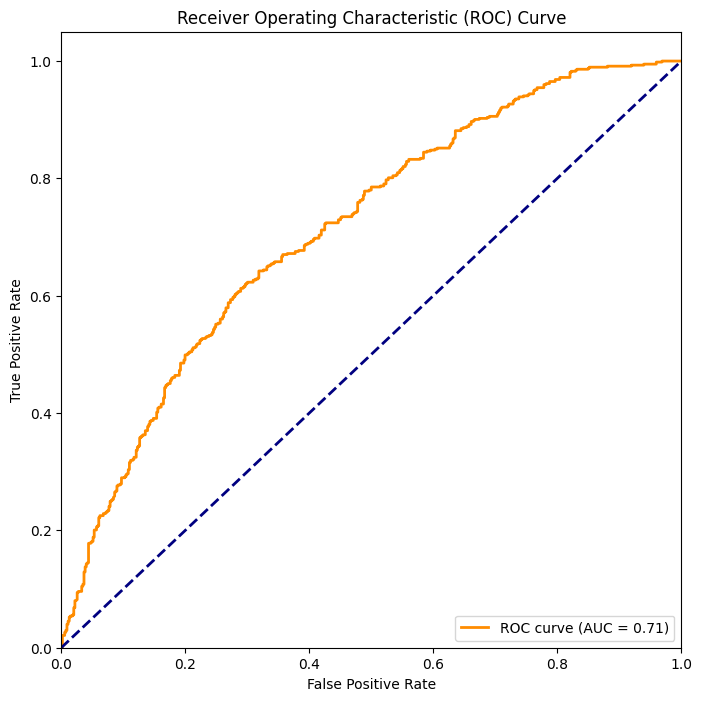

AUC: 0.7119587800216072
Accuracy: 0.6496872207327972


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you already have the true labels 'y_test' and predicted probabilities 'y_pred'
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC and accuracy values
print(f'AUC: {roc_auc}')
print(f'Accuracy: {acc}')

